# Assignment For This Week
Develop program menggunakan algoritma k-means clustring untuk data 20newsgroups 3 kelas: Sport, Religion dan Technology. Sumber materi dapat diakses di https://tita.lecturer.pens.ac.id/TextMining_SDT/M10.%20Text%20Clustering/Text%20Clustering%20with%20TF-IDF%20in%20Python.pdf

Dengan ketentuan:

#### A. Data dalam bentuk Bag of Words
1. menggunakan rumus jarak Euclidean Distance
2. menggunakan rumus jarak Cosine Similarity

### B. Data dalam bentuk TF/IDF
1. menggunakan rumus jarak Euclidean Distance
2. menggunakan rumus jarak Cosine Similarity

### C. Data dalam bentuk Count Vectorizer
1. menggunakan rumus jarak Euclidean Distance
2. menggunakan rumus jarak Cosine Similarity

#### D. Data dalam bentuk Vocabulary menggunakan rumus jarak Jaccard Index

Buat analisa hasil klaster menggunakan metric performance DBI dan Silhoute score. 
Sajikan dalma bentuk presentasi. Unggah file ppt nya.

# Library

In [38]:
# import the dataset from sklearn
from sklearn.metrics import davies_bouldin_score, silhouette_score, pairwise_distances
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize
from sklearn.metrics import jaccard_score

# import other required libs
import pandas as pd
import numpy as np

# string manipulation libs
import re
import string
import nltk
from nltk.corpus import stopwords

# viz libs
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [2]:
for i in fetch_20newsgroups().target_names:
    print(i)

alt.atheism
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
soc.religion.christian
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc


In [3]:
topic_pairs = [('comp.graphics', 'rec.sport.baseball', 'soc.religion.christian')]

newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'), categories=topic_pairs[0])

df = pd.DataFrame(newsgroups.data, columns=["corpus"])
df

,corpus
0,"Hi all,\n\n\tI got tired of waiting for a mail..."
1,"\nDominik,\n\n\tHave you tried xgrasp? It's o..."
2,There was an article on Jewish major leaguers ...
3,\n\n
4,"\n\n\n\tWarren, I agree with your premise... b..."
...,...
2959,"I don't think speed has been determined, since..."
2960,
2961,"\n\n\nVery interesting, but I also believe tha..."
2962,Does anybody know what Delaunay Triangulation ...


In [4]:
def preprocess_text(text: str, remove_stopwords: bool) -> str:
    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    # remove stopwords
    if remove_stopwords:
        # 1. tokenize
        tokens = nltk.word_tokenize(text)
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
        # 3. join back together
        text = " ".join(tokens)
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text

In [5]:
df['cleaned'] = df['corpus'].apply(lambda x: preprocess_text(x, remove_stopwords=True))
df.tail(5)

,corpus,cleaned
2959,"I don't think speed has been determined, since...",think speed determined since never run intel c...
2960,,
2961,"\n\n\nVery interesting, but I also believe tha...",interesting also believe presented misleading ...
2962,Does anybody know what Delaunay Triangulation ...,anybody know delaunay triangulation reference ...
2963,Here is some material by Michael Davies on the...,material michael davies subject schism general...


# A. Bag Of Words

### Euclidian

In [39]:
# initialize the vectorizer
vectorizer = CountVectorizer(binary=True)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(df['cleaned'])

In [40]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [41]:
# Menghitung Euclidean Distance antara dokumen-dokumen
euclidean_dist = euclidean_distances(X)

In [42]:
# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=3, random_state=42)
# fit the model
kmeans.fit(euclidean_dist)
# store cluster labels in a variable
clusters = kmeans.labels_
print(clusters)

c:\Users\BAGAS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 0 0 ... 1 0 1]


In [43]:
# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [44]:
# assign clusters and pca vectors to our dataframe 
df['cluster'] = clusters
df['x0'] = x0
df['x1'] = x1
df

,corpus,cleaned,cluster,x0,x1
0,"Hi all,\n\n\tI got tired of waiting for a mail...",hi got tired waiting mailing list going make o...,0,-0.803353,0.516899
1,"\nDominik,\n\n\tHave you tried xgrasp? It's o...",dominik tried xgrasp several ftp sites sure ar...,0,-0.964399,0.677654
2,There was an article on Jewish major leaguers ...,article jewish major leaguers recent issue ely...,0,-0.882262,0.623890
3,\n\n,,0,-1.241779,0.624722
4,"\n\n\n\tWarren, I agree with your premise... b...",warren agree premise babe two teams right part...,0,-0.865182,0.384447
...,...,...,...,...,...
2959,"I don't think speed has been determined, since...",think speed determined since never run intel c...,0,0.176707,0.045609
2960,,,0,-1.241779,0.624722
2961,"\n\n\nVery interesting, but I also believe tha...",interesting also believe presented misleading ...,1,1.716883,-2.414562
2962,Does anybody know what Delaunay Triangulation ...,anybody know delaunay triangulation reference ...,0,-1.062383,0.611704


In [46]:
# Compute DBI score
euclidean_dbi = davies_bouldin_score(X.toarray(), clusters)

# Compute Silhoutte Score
euclidean_ss = silhouette_score(X.toarray(), clusters, metric='euclidean')

# Print the DBI and Silhoutte Scores
print("DBI Score (Euclidian Distance): ", euclidean_dbi, "\nSilhoutte Score (Euclidian Distance): ", euclidean_ss)

DBI Score (Euclidian Distance):  4.642678069856557 
Silhoutte Score (Euclidian Distance):  0.30352225078789197


In [47]:
def get_top_keywords(n_terms):
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        # for each row of the dataframe, find the n terms that have the highest tf idf score
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) 
            
get_top_keywords(10)


Cluster 0
time,get,thanks,also,anyone,think,like,know,one,would

Cluster 1
god,know,people,see,time,also,think,like,would,one

Cluster 2
know,since,first,see,among,part,new,like,called,several


In [48]:
# map clusters to appropriate labels 
cluster_map = {0: "Sports", 1: "Religion", 2: "Technology"}
# apply mapping
df['cluster'] = df['cluster'].map(cluster_map)

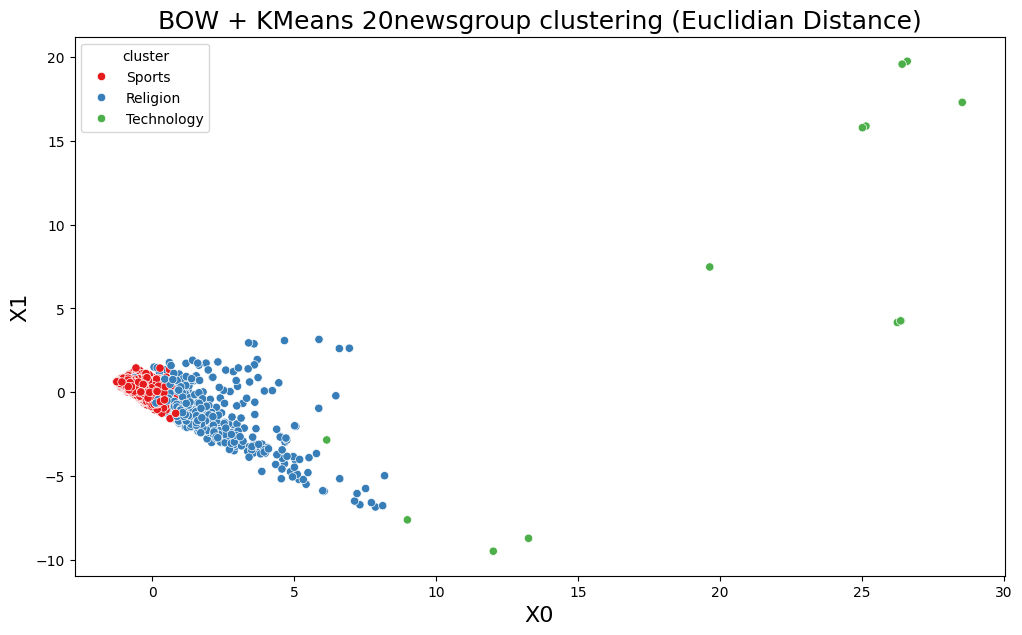

In [49]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("BOW + KMeans 20newsgroup clustering (Euclidian Distance)", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="Set1")
plt.show()

### Cosine

In [50]:
# initialize the vectorizer
vectorizer = CountVectorizer(binary=True)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(df['cleaned'])

In [51]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [52]:
# Menghitung Cosine Similarity antara dokumen-dokumen
cosine_sim = cosine_similarity(X)

In [53]:
# Jumlah cluster yang diinginkan
num_clusters = 3

# K-Means dengan Cosine Distance
kmeans_cosine = KMeans(n_clusters=num_clusters, random_state=0)
kmeans_cosine.fit(cosine_sim)

# Hasil cluster menggunakan Cosine Distance
labels = kmeans_cosine.labels_
print("Hasil Cluster dengan Cosine Distance:")
print(labels)

c:\Users\BAGAS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Hasil Cluster dengan Cosine Distance:
[1 0 0 ... 2 1 2]


In [54]:
# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [55]:
# assign clusters and pca vectors to our dataframe 
df['cluster'] = labels
df['x0'] = x0
df['x1'] = x1
df

,corpus,cleaned,cluster,x0,x1
0,"Hi all,\n\n\tI got tired of waiting for a mail...",hi got tired waiting mailing list going make o...,1,-0.803353,0.516899
1,"\nDominik,\n\n\tHave you tried xgrasp? It's o...",dominik tried xgrasp several ftp sites sure ar...,0,-0.964399,0.677654
2,There was an article on Jewish major leaguers ...,article jewish major leaguers recent issue ely...,0,-0.882262,0.623890
3,\n\n,,0,-1.241779,0.624722
4,"\n\n\n\tWarren, I agree with your premise... b...",warren agree premise babe two teams right part...,0,-0.865182,0.384447
...,...,...,...,...,...
2959,"I don't think speed has been determined, since...",think speed determined since never run intel c...,2,0.176707,0.045609
2960,,,0,-1.241779,0.624722
2961,"\n\n\nVery interesting, but I also believe tha...",interesting also believe presented misleading ...,2,1.716883,-2.414562
2962,Does anybody know what Delaunay Triangulation ...,anybody know delaunay triangulation reference ...,1,-1.062383,0.611704


In [56]:
# Compute DBI score
cosine_distances = pairwise_distances(X.toarray(), metric='cosine')
cosine_dbi = davies_bouldin_score(cosine_distances, labels)

# Compute Silhouette Score dengan Cosine Distance
cosine_ss = silhouette_score(cosine_distances, labels, metric='precomputed')

# Print the DBI and Silhouette Scores
print("DBI Score: ", cosine_dbi)
print("Silhouette Score: ", cosine_ss)


DBI Score:  2.6270152773962807
Silhouette Score:  0.00887389375415242


In [57]:
def get_top_keywords(n_terms):
    df = pd.DataFrame(X.todense()).groupby(labels).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        # for each row of the dataframe, find the n terms that have the highest tf idf score
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) 
            
get_top_keywords(10)


Cluster 0
first,year,last,like,good,edu,also,time,think,one

Cluster 1
one,get,could,graphics,like,please,anyone,know,thanks,would

Cluster 2
say,also,know,people,time,god,like,think,one,would


In [58]:
# map clusters to appropriate labels 
cluster_map = {0: "technology", 1: "Sport", 2: "Religion"}
# apply mapping
df['cluster'] = df['cluster'].map(cluster_map)

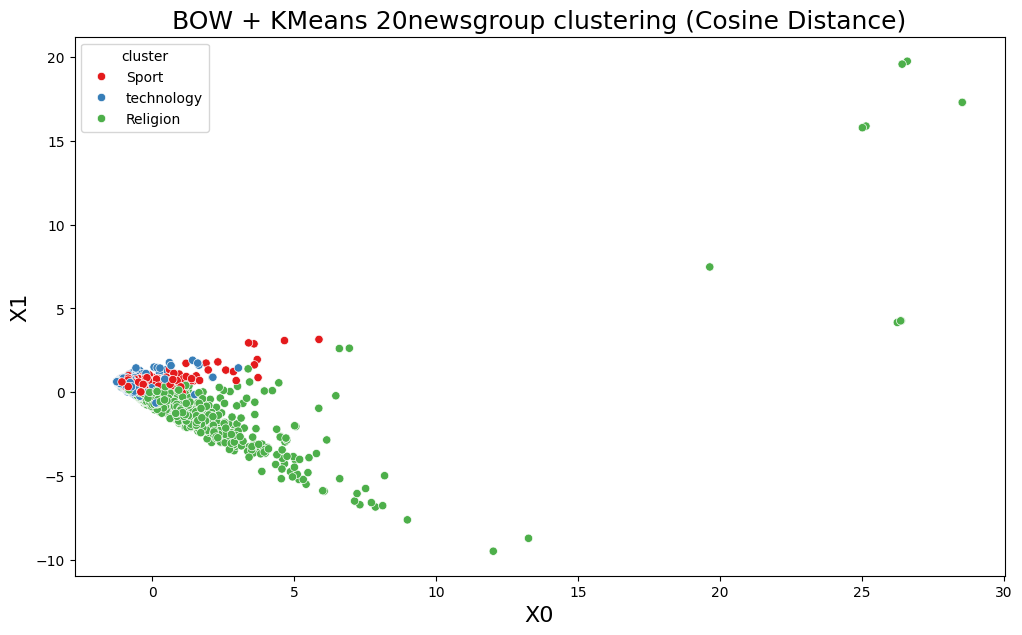

In [59]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("BOW + KMeans 20newsgroup clustering (Cosine Distance)", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="Set1")
plt.show()

# B. TF/IDF

# C. Count Vectorizer

## Euclidean Distance

In [72]:
# Inisialisasi Count Vectorizer
count_vectorizer = CountVectorizer()
X_train_counts = count_vectorizer.fit_transform(df['cleaned'])


In [61]:
# Hitung jarak Euclidean Distance
euclidean_distances = pairwise_distances(X_train_counts, metric='euclidean')
print(euclidean_distances)

[[ 0.          6.70820393  6.78232998 ... 19.07878403  6.40312424
  58.22370651]
 [ 6.70820393  0.          6.08276253 ... 19.15724406  5.29150262
  58.21511831]
 [ 6.78232998  6.08276253  0.         ... 19.33907961  5.74456265
  58.12056435]
 ...
 [19.07878403 19.15724406 19.33907961 ...  0.         19.10497317
  59.5986577 ]
 [ 6.40312424  5.29150262  5.74456265 ... 19.10497317  0.
  58.18075283]
 [58.22370651 58.21511831 58.12056435 ... 59.5986577  58.18075283
   0.        ]]


In [73]:
# Inisialisasi model K-Means
kmeans_euclidean = KMeans(n_clusters=3, random_state=0)

# Latih model K-Means pada data Euclidean Distance
kmeans_euclidean.fit(euclidean_distances)

# Dapatkan label cluster untuk setiap dokumen
cluster_labels_euclidean = kmeans_euclidean.labels_


c:\Users\BAGAS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [75]:
# Perhitungan Davies-Bouldin Index (DBI) Score
dbi_euclidean = metrics.davies_bouldin_score(euclidean_distances, cluster_labels_euclidean)

# Perhitungan Silhouette Score
ss_euclidean = metrics.silhouette_score(euclidean_distances, cluster_labels_euclidean, metric='precomputed')

# Print the DBI and Silhouette Scores
print("DBI Score: ", dbi_euclidean)
print("Silhouette Score: ", ss_euclidean)

DBI Score:  0.47429786118006856
Silhouette Score:  0.6647145829510481


In [76]:
# Mencetak kata kunci teratas untuk setiap kluster
def get_top_keywords_euclidean(n_terms):
    df = pd.DataFrame(X_train_counts.toarray()).groupby(cluster_labels_euclidean).mean()
    terms = count_vectorizer.get_feature_names_out()
    for i, r in df.iterrows():
        print('\nCluster {} (Euclidean)'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]]))

get_top_keywords_euclidean(10)



Cluster 0 (Euclidean)
gif,ftp,available,images,data,file,graphics,edu,jpeg,image

Cluster 1 (Euclidean)
good,time,also,people,think,know,like,god,one,would

Cluster 2 (Euclidean)
christ,church,may,us,jesus,also,people,would,one,god


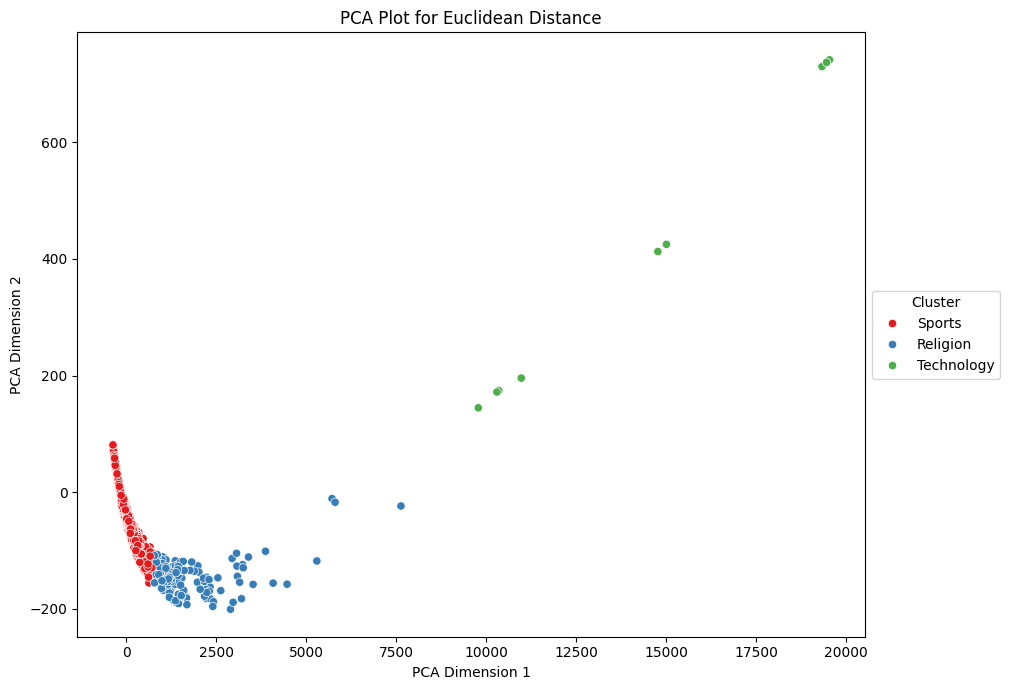

In [65]:
from sklearn.decomposition import PCA

# Inisialisasi objek PCA dengan jumlah komponen yang diinginkan (misalnya, 2)
pca = PCA(n_components=2)

# Lakukan reduksi dimensi pada matriks Euclidean Distance
X_reduced_euclidean = pca.fit_transform(euclidean_distances)

# Tentukan label nama cluster sesuai hasil clustering Euclidean
cluster_labels_euclidean = kmeans_euclidean.labels_

# Buat DataFrame dari hasil PCA
pca_df_euclidean = pd.DataFrame({'PCA Dimension 1': X_reduced_euclidean[:, 0], 'PCA Dimension 2': X_reduced_euclidean[:, 1], 'Cluster': cluster_labels_euclidean})

# Map clusters to appropriate labels 
cluster_map = {0: "Technology", 1: "Sports", 2: "Religion"}
pca_df_euclidean['Cluster'] = pca_df_euclidean['Cluster'].map(cluster_map)

# Visualisasikan hasil dengan PCA (Euclidean)
plt.figure(figsize=(12, 7))
scatter_euclidean = sns.scatterplot(data=pca_df_euclidean, x='PCA Dimension 1', y='PCA Dimension 2', hue='Cluster', palette="Set1")
plt.title("PCA Plot for Euclidean Distance")

# Tambahkan legenda
plt.legend(*scatter_euclidean.get_legend_handles_labels(), loc="center left", bbox_to_anchor=(1.0, 0.5), title="Cluster")

plt.tight_layout(rect=[0, 0, 0.85, 1])

# Tampilkan grafik
plt.show()


## Cosine similarity

In [66]:
# Hitung matriks Cosine Similarities
cosine_similarities = cosine_similarity(X_train_counts)

In [67]:
# Inisialisasi model K-Means dengan 3 cluster dan random state
kmeans_cosine = KMeans(n_clusters=3, random_state=42)

# Latih model K-Means pada data Cosine Similarity
kmeans_cosine.fit(cosine_similarities)

# Dapatkan label cluster untuk setiap dokumen (Cosine)
cluster_labels_cosine = kmeans_cosine.labels_

c:\Users\BAGAS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [68]:
# Inisialisasi PCA dengan 2 komponen
pca = PCA(n_components=2)
X_reduced_cosine = pca.fit_transform(cosine_similarities)

# Tambahkan label cluster ke DataFrame PCA (Cosine)
pca_df_cosine = pd.DataFrame(X_reduced_cosine, columns=['PCA Dimension 1', 'PCA Dimension 2'])
pca_df_cosine['Cluster'] = cluster_labels_cosine

In [77]:
# Compute DBI score
cosine_distances = pairwise_distances(X.toarray(), metric='cosine')
cosine_dbi = davies_bouldin_score(cosine_distances, labels)

# Compute Silhouette Score dengan Cosine Distance
cosine_ss = silhouette_score(cosine_distances, labels, metric='precomputed')

# Print the DBI and Silhouette Scores
print("DBI Score: ", cosine_dbi)
print("Silhouette Score: ", cosine_ss)


DBI Score:  4.255126805044526
Silhouette Score:  0.00520734442798114


In [69]:
# Mencetak kata kunci teratas untuk setiap kluster (Cosine)
def get_top_keywords_cosine(n_terms):
    df = pd.DataFrame(X_train_counts.toarray()).groupby(cluster_labels_cosine).mean()
    terms = count_vectorizer.get_feature_names_out()
    for i, r in df.iterrows():
        print('\nCluster {} (cosine similarity)'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]]))

get_top_keywords_cosine(10)


Cluster 0 (cosine similarity)
know,get,like,edu,also,graphics,jpeg,one,image,would

Cluster 1 (cosine similarity)
church,believe,think,christ,us,jesus,people,would,one,god

Cluster 2 (cosine similarity)
get,one,use,please,lost,may,also,image,edu,graphics


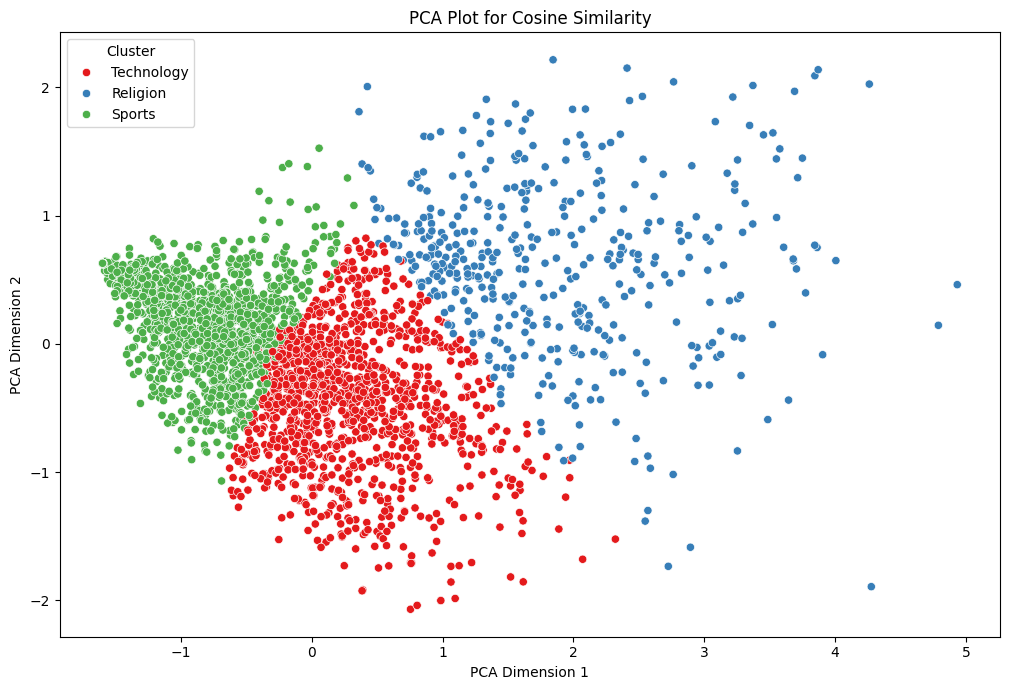

In [70]:
plt.figure(figsize=(12, 7))
scatter_cosine = sns.scatterplot(data=pca_df_cosine, x='PCA Dimension 1', y='PCA Dimension 2', hue='Cluster', palette="Set1")

# Pemberian label legenda sesuai dengan nama kluster
legend = scatter_cosine.get_legend()
legend.set_title("Cluster")
for text, label in zip(legend.texts, ["Technology", "Religion", "Sports"]):
    text.set_text(label)

plt.title("PCA Plot for Cosine Similarity")
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


# D. Jaccard Index

In [71]:
# Inisialisasi TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Ubah dokumen menjadi vektor fitur
X = vectorizer.fit_transform(df['cleaned'])

# Inisialisasi matriks untuk menyimpan skor Jaccard
jaccard_scores = np.zeros((len(topic_pairs), len(topic_pairs)))

# Hitung skor Jaccard antara setiap pasangan topik
for i in range(len(topic_pairs)):
    for j in range(i, len(topic_pairs)):
        topic1_index = newsgroups.target_names.index(topic_pairs[i][0])
        topic2_index = newsgroups.target_names.index(topic_pairs[j][1])
        
        topic1_documents = X[newsgroups.target == topic1_index]
        topic2_documents = X[newsgroups.target == topic2_index]
        
        min_num_documents = min(topic1_documents.shape[0], topic2_documents.shape[0])
        
        topic1_bin = (topic1_documents > 0).astype(int)[:min_num_documents]
        topic2_bin = (topic2_documents > 0).astype(int)[:min_num_documents]
        jaccard = jaccard_score(topic1_bin, topic2_bin, average='micro')
        
        jaccard_scores[i, j] = jaccard
        jaccard_scores[j, i] = jaccard

# Cetak matriks skor Jaccard
print("======================== Jaccard Similarity Scores : ========================")
for i in range(len(topic_pairs)):
    for j in range(len(topic_pairs)):
        topic1 = topic_pairs[i][0]
        topic2 = topic_pairs[j][1]
        similarity_score = jaccard_scores[i, j]
        print(f"|.| Jaccard Similarity between '{topic1}' and '{topic2}': {similarity_score}")

# Cetak rata-rata skor Jaccard
average_similarity = np.mean(jaccard_scores)
print(f"\n<.> Average Jaccard Similarity: {average_similarity}")

======================== Jaccard Similarity Scores : ========================
|.| Jaccard Similarity between 'comp.graphics' and 'rec.sport.baseball': 0.01042525513475879

<.> Average Jaccard Similarity: 0.01042525513475879
